1. with heights pressure decrease. so get the differenece bet pressure at height 45 and height 1. pressure should always decrease with height increase.
2. high speed winds- max of the wind speed in 45 heights.
3. dew point temperature can never be higher than air temperature.

In [1]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.grid_search import RandomizedSearchCV
from catboost import CatBoostClassifier

from rgf.sklearn import RGFClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from ggplot import *
from xgboost import XGBRegressor

C:\Users\royal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\royal\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\royal\Anaconda3\lib\site-packages\ggplot\stats\smoot

In [2]:
%%time
os.chdir('C:\\Users\\royal\\Downloads\\Compressed\\flight_predictor_data')
train=pd.read_csv('weather_data_train.csv')
test=pd.read_csv('weather_data_test.csv')
train_flt = pd.read_csv('flight_data_train.csv')

Wall time: 3.58 s


In [103]:
##read denoising train and test files.
os.chdir('C:\\Users\\royal\\Downloads\\Compressed\\flight_predictor_data')
train_l = np.load('train_data_dae_org.npy')
test_l = np.load('test_data_dae_org.npy')
# Y = np.load('train_target_org.npy')

In [18]:
print(train1.shape)
print(Y.shape)

(2183, 1125)
(2183,)


In [42]:
train.describe()

,Day_Id,Station1 Dew Point Height1,Station1 Dew Point Height2,Station1 Dew Point Height3,Station1 Dew Point Height4,Station1 Dew Point Height5,Station1 Dew Point Height6,Station1 Dew Point Height7,Station1 Dew Point Height8,Station1 Dew Point Height9,...,Station5 Wind Speed Height36,Station5 Wind Speed Height37,Station5 Wind Speed Height38,Station5 Wind Speed Height39,Station5 Wind Speed Height40,Station5 Wind Speed Height41,Station5 Wind Speed Height42,Station5 Wind Speed Height43,Station5 Wind Speed Height44,Station5 Wind Speed Height45
count,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,...,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000
mean,1161.975263,5.424167,4.935076,4.461103,4.042764,3.554599,3.020216,2.470416,1.933228,1.396137,...,24.596934,24.916352,25.241739,25.573145,25.893053,26.221007,26.553247,26.890890,27.237081,27.584012
std,673.965531,9.471207,9.538955,9.693580,9.822583,9.861115,9.916416,9.997071,10.070162,10.135811,...,12.546472,12.710584,12.867511,13.028636,13.188974,13.345971,13.509388,13.692444,13.879558,14.084127
min,1.000000,-112.889831,-112.759452,-112.629074,-112.498696,-112.368318,-112.237940,-112.107562,-111.977184,-111.846806,...,0.000000,0.000000,0.009083,0.246400,0.103527,0.332447,0.198479,0.096386,0.147117,0.058398
25%,578.500000,1.232608,0.752023,0.237731,-0.372771,-0.812917,-1.441226,-2.268203,-2.781116,-3.409715,...,15.161252,15.429079,15.750631,16.026380,16.369179,16.453653,16.708970,16.831048,16.985326,17.249704
50%,1162.000000,6.414188,5.899363,5.588889,5.324444,4.784173,4.241860,3.742776,3.273444,2.698563,...,23.000000,23.014218,23.304348,23.593723,23.872340,24.000000,24.154587,24.454918,24.725689,25.000000
75%,1746.500000,11.651285,11.230862,10.890605,10.598843,10.138906,9.691971,9.354228,8.876311,8.321108,...,32.264178,32.778230,33.204379,33.733717,34.237816,34.683905,35.000000,35.322170,35.726893,35.973528
max,2332.000000,20.749333,20.233251,20.133995,20.034739,19.903465,19.754950,19.596154,19.431319,19.266484,...,76.809359,77.329289,77.849220,78.414720,78.998832,79.936937,81.922156,83.797688,85.642643,87.544545


In [49]:
train.head()
# train[['Station1 Dew Point Height1','Station1 Dew Point Height2', 'Station1 Dew Point Height3', 'Station1 Dew Point Height4', 'Station1 Dew Point Height5']]

,Day_Id,Station1 Dew Point Height1,Station1 Dew Point Height2,Station1 Dew Point Height3,Station1 Dew Point Height4,Station1 Dew Point Height5,Station1 Dew Point Height6,Station1 Dew Point Height7,Station1 Dew Point Height8,Station1 Dew Point Height9,...,Station1 Wind Speed Height std,Station1 Wind Speed Height var,Station2 Wind Speed Height std,Station2 Wind Speed Height var,Station3 Wind Speed Height std,Station3 Wind Speed Height var,Station4 Wind Speed Height std,Station4 Wind Speed Height var,Station5 Wind Speed Height std,Station5 Wind Speed Height var
0,1,7.351064,7.328571,6.866540,6.410266,5.918868,5.309172,4.687870,4.066568,2.283636,...,10.174393,103.518276,8.840087,78.147142,8.845198,78.237530,11.738435,137.790853,8.416425,70.836213
1,2,2.086769,0.948308,-0.190154,-1.763636,-5.848000,-8.795752,-9.963894,-11.132035,-12.300177,...,2.365625,5.596180,5.173192,26.761918,2.184728,4.773039,3.678589,13.532018,2.051025,4.206702
2,3,2.014286,1.657143,1.400000,1.400000,0.407164,-0.727164,-1.861493,-2.995821,-4.086486,...,4.237920,17.959964,10.613650,112.649572,8.720882,76.053774,6.111639,37.352136,4.039913,16.320898
3,4,0.249462,-0.153846,-1.998723,-3.843600,-4.712595,-4.903435,-5.094275,-5.502703,-6.427273,...,7.805156,60.920457,19.790483,391.663218,8.487827,72.043208,18.787042,352.952953,8.726742,76.156028
4,5,2.827496,2.179510,1.599225,1.211628,0.824031,0.443396,0.066038,-0.311321,-0.688679,...,14.599776,213.153466,14.047199,197.323796,11.859431,140.646101,2.588373,6.699677,12.051564,145.240184


In [5]:
##create the pandas for 5 column bin on train and test files
train_bin = pd.DataFrame()
test_bin = pd.DataFrame()
train_bin['Day_Id'] = train['Day_Id']
test_bin['Day_Id'] = test['Day_Id']

In [72]:
def pca_trans(train2,test2):
    pca = PCA(n_components=1)
    pca.fit(train2)
    train2 = pca.transform(train2)
    test2 = pca.transform(test2)
    return train2,test2

In [73]:
##get the bin of 5 columns by using pca transform.
aa=['Dew Point','Pressure','Temperature','Wind Direction','Wind Speed']
hh=['Station1','Station2','Station3','Station4','Station5']
for i in aa:
    for j in hh:
        for k in range(0,45,5):
            train_bin[j+' '+i+' Height '+str(1+k)+'-'+str(5+k)] , test_bin[j+' '+i+' Height '+str(1+k)+'-'+str(5+k)] =  pca_trans ( train[[ j+' '+i+' Height'+str(1+k) , j+' '+i+' Height'+str(2+k) , j+' '+i+' Height'+str(3+k) , j+' '+i+' Height'+str(4+k) , j+' '+i+' Height'+str(5+k)]] , 
            test[[j+' '+i+' Height'+str(1+k) , j+' '+i+' Height'+str(2+k) , j+' '+i+' Height'+str(3+k) , j+' '+i+' Height'+str(4+k) , j+' '+i+' Height'+str(5+k) ]] )

In [4]:
##get the bin of 5 columns by averaging.
aa=['Dew Point','Pressure','Temperature','Wind Direction','Wind Speed']
hh=['Station1','Station2','Station3','Station4','Station5']
for i in aa:
    for j in hh:
        for k in range(0,45,5):
            train_bin[j+' '+i+' Height '+str(1+k)+'-'+str(5+k)] = (train[j+' '+i+' Height'+str(1+k)] + train[j+' '+i+' Height'+str(2+k)] + train[j+' '+i+' Height'+str(3+k)] + train[j+' '+i+' Height'+str(4+k)] + train[j+' '+i+' Height'+str(5+k)])/5
            test_bin[j+' '+i+' Height '+str(1+k)+'-'+str(5+k)] = (test[j+' '+i+' Height'+str(1+k)]+test[j+' '+i+' Height'+str(2+k)]+test[j+' '+i+' Height'+str(3+k)]+test[j+' '+i+' Height'+str(4+k)]+test[j+' '+i+' Height'+str(5+k)])/5

In [75]:
train_bin.head()

,Day_Id,Station1 Dew Point Height 1-5,Station1 Dew Point Height 6-10,Station1 Dew Point Height 11-15,Station1 Dew Point Height 16-20,Station1 Dew Point Height 21-25,Station1 Dew Point Height 26-30,Station1 Dew Point Height 31-35,Station1 Dew Point Height 36-40,Station1 Dew Point Height 41-45,...,Station4 Wind Speed Height 41-45,Station5 Wind Speed Height 1-5,Station5 Wind Speed Height 6-10,Station5 Wind Speed Height 11-15,Station5 Wind Speed Height 16-20,Station5 Wind Speed Height 21-25,Station5 Wind Speed Height 26-30,Station5 Wind Speed Height 31-35,Station5 Wind Speed Height 36-40,Station5 Wind Speed Height 41-45
0,1,-5.128198,-2.410192,10.347178,18.629164,26.338153,19.416776,0.905953,-10.095384,-6.044673,...,52.670756,28.596149,48.983957,49.857972,52.461668,55.141686,57.552497,59.737853,63.493158,66.659249
1,2,12.216114,29.229008,31.967490,19.539139,14.605619,23.040202,35.415918,33.540045,17.700256,...,-30.819653,-16.774493,-20.355301,-22.922815,-26.758525,-31.700995,-38.012867,-43.579060,-48.521193,-54.286301
2,3,6.940623,10.995780,12.343798,7.559403,3.088578,-2.480648,-9.437110,-15.476510,-17.034889,...,-14.955734,-26.943569,-26.171538,-23.322770,-21.104279,-19.929685,-19.409130,-19.198503,-22.613786,-28.796087
3,4,14.746824,17.404474,19.497290,20.707459,20.685453,23.938141,20.860676,17.354849,14.690982,...,66.396540,11.919355,33.405490,54.598018,69.184066,61.909709,51.030719,39.735908,28.662206,17.589272
4,5,6.162358,4.990583,1.653905,-0.548039,6.462956,11.852664,34.580201,54.129647,49.874905,...,26.618217,6.085414,22.120416,36.177812,50.559525,62.958660,70.048828,63.159102,55.887434,54.025096


In [74]:
train_bin.shape

(2183, 226)

In [116]:
##create the pandas for all column bin into single coulmn for train and test files
train_all = pd.DataFrame()
test_all = pd.DataFrame()
train_all['Day_Id'] = train['Day_Id']
test_all['Day_Id'] = test['Day_Id']

In [118]:
##for getting the bin of all 45 columns into single column.
aa=['Dew Point','Pressure','Temperature','Wind Direction','Wind Speed']
hh=['Station1','Station2','Station3','Station4','Station5']
for i in aa:
    for j in hh:
        train_all[j+' '+i+' Height all'] = 0
        test_all[j+' '+i+' Height all'] = 0
        for k in range(1,46):
            train_all[j+' '+i+' Height all'] += train[j+' '+i+' Height'+str(k)]
            test_all[j+' '+i+' Height all'] += test[j+' '+i+' Height'+str(k)]
        train_all[j+' '+i+' Height all'] /= 45
        test_all[j+' '+i+' Height all'] /= 45

In [119]:
train_all.head()

,Day_Id,Station1 Dew Point Height all,Station2 Dew Point Height all,Station3 Dew Point Height all,Station4 Dew Point Height all,Station5 Dew Point Height all,Station1 Pressure Height all,Station2 Pressure Height all,Station3 Pressure Height all,Station4 Pressure Height all,...,Station1 Wind Direction Height all,Station2 Wind Direction Height all,Station3 Wind Direction Height all,Station4 Wind Direction Height all,Station5 Wind Direction Height all,Station1 Wind Speed Height all,Station2 Wind Speed Height all,Station3 Wind Speed Height all,Station4 Wind Speed Height all,Station5 Wind Speed Height all
0,1,-12.089598,-15.175504,-15.377051,-11.928256,-14.162777,748.674538,745.301445,747.851839,744.611444,...,261.919782,260.090029,247.144025,258.556300,269.147013,20.277815,28.151694,32.000318,35.888274,44.788021
1,2,-20.286577,-28.737244,-14.687358,-29.880521,-15.666609,742.661905,742.322896,743.067386,742.500377,...,170.810593,231.749709,162.157828,260.689027,48.949456,4.726632,8.464594,5.407399,4.825642,5.798376
2,3,-9.331505,-12.737436,-11.549387,-6.789832,-4.766934,744.624457,745.120673,746.004451,746.215536,...,133.653007,234.218838,101.678315,110.212969,48.660708,12.232534,18.699017,13.603484,16.383116,10.534605
3,4,-17.941591,-17.091250,-16.443974,-15.889391,-16.541653,743.634641,745.711098,746.087630,747.322679,...,119.987963,113.700260,70.971398,59.542458,80.298003,16.896882,29.137041,28.445462,31.585672,39.122515
4,5,-17.899102,-11.754986,-17.112464,-14.337166,-17.671741,726.222990,722.534832,726.003317,721.210315,...,227.720677,238.448469,250.388142,260.189223,277.594345,25.243524,28.619012,34.421809,33.287804,41.748771


create new features like difference,max,min,std,var and mean.

In [7]:
##get the max,min,standard deviation,variance,mean and difference between top and lowerheight parameters for all the conditions
aa=['Dew Point','Pressure','Temperature','Wind Direction','Wind Speed']
hh=['Station1','Station2','Station3','Station4','Station5']
for i in aa:
    for j in hh:
        ls=[]
        for k in range(1,46):
            ls.append(j+' '+i+' Height'+str(k))
        train[j+' '+i+' Height max']=train[ls].max(axis=1)
        train[j+' '+i+' Height min']=train[ls].min(axis=1)
        train[j+' '+i+' Height std']=train[ls].std(axis=1)
        train[j+' '+i+' Height var']=train[ls].var(axis=1)
        train[j+' '+i+' Height var']=train[ls].mean(axis=1)
        
        test[j+' '+i+' Height var']=test[ls].mean(axis=1)
        test[j+' '+i+' Height var']=test[ls].var(axis=1)
        test[j+' '+i+' Height std']=test[ls].std(axis=1)
        test[j+' '+i+' Height max']=test[ls].max(axis=1)
        test[j+' '+i+' Height min']=test[ls].min(axis=1)
        
        train[j+' '+i+' Height max-min']=train[j+' '+i+' Height max']-train[j+' '+i+' Height min']
        test[j+' '+i+' Height max-min']=test[j+' '+i+' Height max']-test[j+' '+i+' Height min']

In [8]:
train.shape

(2183, 1276)

In [22]:
train_flt.head()

,Day_Id,Spot1 maxDistance,Spot1 totalDistance,Spot1 totalFlights,Spot2 maxDistance,Spot2 totalDistance,Spot2 totalFlights,Spot3 maxDistance,Spot3 totalDistance,Spot3 totalFlights,...,Spot287 maxDistance,Spot287 totalDistance,Spot287 totalFlights,Spot288 maxDistance,Spot288 totalDistance,Spot288 totalFlights,total,label,maxDistance,totalDistance
0,1,0.00,0.00,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0,0,0,0.00,0.00
1,2,23.84,41.82,2,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0,3,0,34.75,52.73
2,3,0.00,0.00,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0,2,0,5.82,10.49
3,4,0.00,0.00,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0,1,0,7.38,7.38
4,5,24.40,48.20,2,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0,3,0,27.52,51.32


In [ ]:
train_flt[['maxDistance','totalDistance','total','label']]

In [10]:
len(train.columns)

1151

In [21]:
##get the total sum for all the total flights in 289 spots
train_flt['total']=0
train_flt['maxDistance']=0
train_flt['totalDistance']=0
for i in range(1,289):
    train_flt['total']+=train_flt['Spot'+str(i)+' totalFlights']
    train_flt['maxDistance']+=train_flt['Spot'+str(i)+' maxDistance']
    train_flt['totalDistance']+=train_flt['Spot'+str(i)+' totalDistance']

In [9]:
train_flt['total'].unique()

array([  0,   3,   2,   1,   7,   6,  21,  11,  14,   9,  29,   4,  49,
        13,  97,  53,  25,  10,  71,  74,   5,  22, 156,  15,  16,  32,
        12,  24,   8,  75,  40,  30,  19,  35,  34,  58,  18,  20,  17,
        81, 132, 102, 106,  96,  76, 111, 109,  57,  26,  91,  65,  62,
        23,  60,  37,  46,  36,  66, 105,  89,  27,  78,  31,  77,  55,
        72, 125,  33,  93,  54,  84,  63,  52,  28,  47, 137, 194, 110,
       104, 164, 190, 171, 150, 161,  95,  80,  90,  43,  50,  39, 120,
        56, 243, 170,  44,  68, 128,  79, 158, 204,  82,  92, 142,  73,
       126,  94, 141,  98, 100, 145, 107, 114,  70,  61,  41, 187,  51,
        99,  67,  38,  45,  88, 130, 116, 113, 307, 121, 222, 175, 249,
       233, 172,  64,  42, 103, 168,  59, 118, 127, 144, 119, 152, 157,
        87, 266,  48, 198, 295, 306, 245, 189, 140, 101,  69,  83, 124,
       117, 203, 394, 208, 176, 305, 178, 200,  86, 173, 242, 248, 244,
       153, 148, 313, 235, 134, 259, 177, 151, 146, 115,  85, 13

In [36]:
##for creating the multi label output
train_flt['label']=0
for i,j in enumerate(train_flt['total']):
    if j>=0 and j<=10:
        train_flt.loc[i, 'label']=0
    elif j>=11 and j<=20:
        train_flt.loc[i, 'label']=1
    else:
        train_flt.loc[i, 'label']=2

In [10]:
##for creating the binary label output
train_flt['label']=0
for i,j in enumerate(train_flt['total']):
    if j>=15:
        train_flt.loc[i, 'label']=1

In [42]:
train_flt['label'].unique()

array([0, 2, 1], dtype=int64)

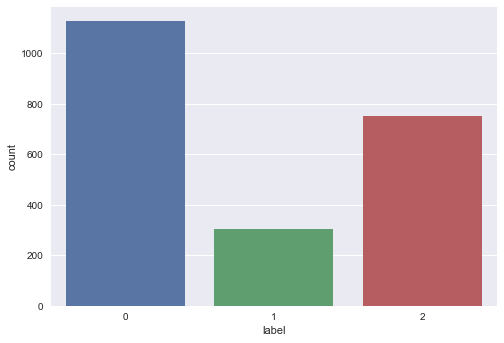

In [43]:
sns.countplot(train_flt.label)

In [147]:
train1 = np.row_stack((train1,train_l))
# test1 = np.row_stack((test1,test_l))
Y1 = np.append(Y,Y,0)

In [37]:
#remove the id and label from the train and test
train_day=train['Day_Id']
train1=train.drop(['Day_Id'],axis=1)
train1=train1.values
Y=train_flt['label'].values
# Y=train_flt['maxDistance'].values

test_day=test['Day_Id']
test1=test.drop(['Day_Id'],axis=1)
test1=test1.values

In [104]:
train_day=train_bin['Day_Id']
train1=train_bin.drop(['Day_Id'],axis=1)
train1=train1.values
Y=train_flt['label'].values

test_day=test_bin['Day_Id']
test1=test_bin.drop(['Day_Id'],axis=1)
test1=test1.values

In [120]:
train_day=train_all['Day_Id']
train1=train_all.drop(['Day_Id'],axis=1)
train1=train1.values
Y=train_flt['label'].values

test_day=test_all['Day_Id']
test1=test_all.drop(['Day_Id'],axis=1)
test1=test1.values

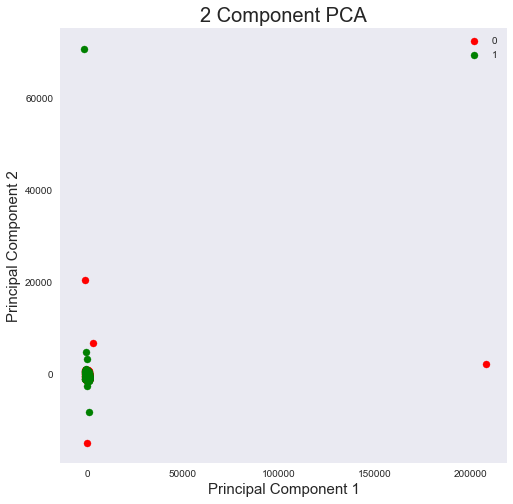

In [18]:
##pca transform to get 2 dimensional data and graph
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train1)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, train_flt['label']], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

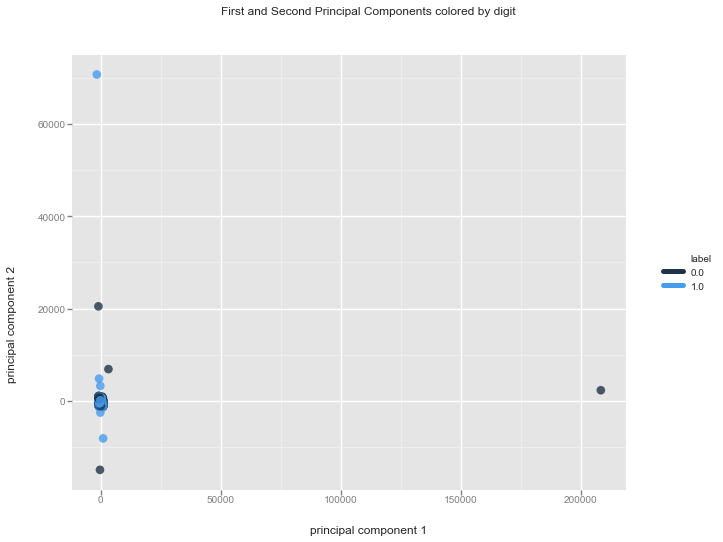

<ggplot: (13837537)>

In [40]:
##pca transform to get 3 dimensional data and graph
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(train1)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, train_flt['label']], axis = 1)

rndperm = np.random.permutation(finalDf.shape[0])

chart = ggplot( finalDf.loc[rndperm[:3000],:], aes(x='principal component 1', y='principal component 2', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [58]:
#scale the data before applying the PCA.
scaler = StandardScaler()
scaler.fit(train1)
train2 = scaler.transform(train1)
test2 = scaler.transform(test1)

pca = PCA(n_components=225)
pca.fit(train2)
train2 = pca.transform(train2)
test2 = pca.transform(test2)

In [15]:
##feature selection to get important features only.
sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
sel.fit(train1)
train2 = sel.transform(train1)
test2 = sel.transform(test1)

In [137]:
print(train2.shape)
print(test2.shape)
print(train1.shape)

(6549, 1125)
(100, 1125)
(6549, 1125)


In [40]:
# Apply transform to both the training set and the test set.
scaler = StandardScaler()
scaler.fit(train1)
train2 = scaler.transform(train1)
test2 = scaler.transform(test1)

# train3 = preprocessing.normalize(train2)
# test3 = preprocessing.normalize(test2)

In [ ]:
#create the cross validation fold for different boosting and linear model.
from sklearn.cross_validation import StratifiedKFold
SEED=42
clf = lgb.LGBMClassifier()
st_train = train2
st_test = test2
# Y=Y1
# clf = SVC(probability=True)
# clf = RandomForestClassifier(max_depth=4, random_state=0)
# clf = lgb.LGBMClassifier(max_depth= 4, learning_rate=0.0677, n_estimators=213, num_leaves= 4, reg_alpha=4.6847 , reg_lambda= 0.0464) #lgb_pca
# clf = lgb.LGBMClassifier(max_depth= 10, learning_rate=0.044, n_estimators=255, num_leaves= 17, reg_alpha=1.0824, reg_lambda= 0.0386)
# clf=CatBoostClassifier(iterations=150)
# clf = XGBClassifier()
# clf = Ridge()

# clf=ExtraTreesClassifier(n_estimators=10000, criterion='entropy', max_depth=9,  min_samples_leaf=1,  n_jobs=30, random_state=1)
# clf = XGBClassifier(gamma = 1.0,learning_rate = 0.010,max_depth = 5,min_child_weight = 10,n_estimators = 338,subsample = 0.800,colsample_bytree = 0.50)
# clf = RGFClassifier(max_leaf=500,algorithm="RGF",test_interval=100, loss="LS")
# clf = LogisticRegression()
# clf = LogisticRegression(class_weight ={1:5})

fold = 5
cv = StratifiedKFold(Y, n_folds=fold,shuffle=True, random_state=42)
X_preds = np.zeros(st_train.shape[0])
preds = np.zeros(st_test.shape[0])
for i, (tr, ts) in enumerate(cv):
    print(ts.shape)
    mod = clf.fit(st_train[tr], Y[tr])
    X_preds[ts] = mod.predict_proba(st_train[ts])[:,1]
    preds += mod.predict_proba(st_test)[:,1]
    print("fold {}, ROC AUC: {:.3f}".format(i, roc_auc_score(Y[ts], X_preds[ts])))
score = roc_auc_score(Y, X_preds)
print(score)
preds1 = preds/fold

In [ ]:
(437,)
fold 0, ROC AUC: 0.780
(437,)
fold 1, ROC AUC: 0.801
(437,)
fold 2, ROC AUC: 0.774
(436,)
fold 3, ROC AUC: 0.771
(436,)
fold 4, ROC AUC: 0.747
0.774917820146058

0.7153833958811973
0.45


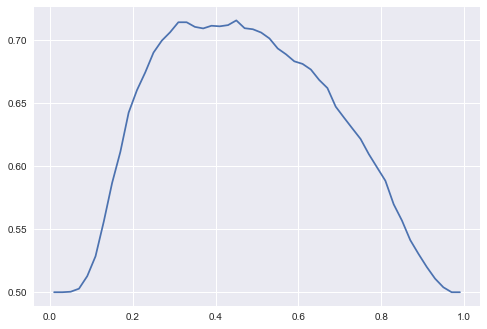

In [16]:
# pick the best threshold out-of-fold
thresholds = np.linspace(0.01, 0.99, 50)
mcc = np.array([roc_auc_score(Y, X_preds>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
best_threshold = thresholds[mcc.argmax()]
print(mcc.max())
print(best_threshold)

# 0.7223264686619609
# 0.33

In [17]:
##create the submission file.
prediction_rfc=list(range(len(preds1)))
for i in range(len(preds1)):
    prediction_rfc[i]=1 if preds1[i]>best_threshold else 0

sub = pd.DataFrame({'Day_Id': test_day, 'Good_Bad': prediction_rfc})
sub=sub.reindex(columns=["Day_Id","Good_Bad"])
filename = 'submission.csv'
sub.to_csv(filename, index=False)

In [154]:
##probability format oof files
outname = 'prob_svm_1251d_'+'{:.5f}'.format(score)

sub = pd.DataFrame({'Day_Id': test_day, 'Good_Bad': preds1})
sub=sub.reindex(columns=["Day_Id","Good_Bad"])
filename = outname +  '_test.csv'
sub.to_csv('oof+test//'+filename, index=False)

sub = pd.DataFrame({'Day_Id': train_day, 'Good_Bad': X_preds})
sub=sub.reindex(columns=["Day_Id","Good_Bad"])
filename = outname + '_train.csv'
sub.to_csv('oof+test//'+filename, index=False)

ValueError: array length 4366 does not match index length 2183

In [18]:
##binary format oof files
outname = 'bin_svm_1251d_'+'{:.5f}'.format(score)

prediction_rfc=list(range(len(preds1)))
for i in range(len(preds1)):
    prediction_rfc[i]=1 if preds1[i]>best_threshold else 0

sub = pd.DataFrame({'Day_Id': test_day, 'Good_Bad': prediction_rfc})
sub=sub.reindex(columns=["Day_Id","Good_Bad"])
filename = outname +  '_test.csv'
sub.to_csv('oof+test//'+filename, index=False)

prediction_tr=list(range(len(X_preds)))
for i in range(len(X_preds)):
    prediction_tr[i]=1 if X_preds[i]>best_threshold else 0

sub = pd.DataFrame({'Day_Id': train_day, 'Good_Bad': prediction_tr})
sub=sub.reindex(columns=["Day_Id","Good_Bad"])
filename = outname + '_train.csv'
sub.to_csv('oof+test//'+filename, index=False)

In [ ]:
#xgboost bayesian optimization
from sklearn.cross_validation import cross_val_score
from bayes_opt import BayesianOptimization

def xgboostcv(max_depth,learning_rate,n_estimators,gamma,min_child_weight):
    return cross_val_score(xgb.XGBClassifier(max_depth=int(max_depth),learning_rate=learning_rate,n_estimators=int(n_estimators),
                                             silent=True,nthread=-1,gamma=gamma,min_child_weight=min_child_weight),
                           train2,Y,"roc_auc",cv=3).mean()

xgboostBO = BayesianOptimization(xgboostcv,{'max_depth': (4, 10),'learning_rate': (0.001, 0.3),'n_estimators': (50, 1000),
               'gamma': (0.01,1.0),'min_child_weight': (2, 10)})

xgboostBO.maximize()
print('-'*53)
print('Final Results')
print('XGBOOST: %f' % xgboostBO.res['max']['max_val'])

In [91]:
#lightgbm bayesian optimization
from sklearn.cross_validation import cross_val_score
from bayes_opt import BayesianOptimization

def xgboostcv(max_depth,learning_rate,n_estimators,num_leaves,reg_alpha,reg_lambda):
    return cross_val_score(lgb.LGBMClassifier(max_depth=int(max_depth),learning_rate=learning_rate,n_estimators=int(n_estimators),
                                             silent=True,nthread=-1,num_leaves=int(num_leaves),reg_alpha=reg_alpha,
                                           reg_lambda=reg_lambda),
                           train2,Y,"roc_auc",cv=3).mean()

xgboostBO = BayesianOptimization(xgboostcv,{'max_depth': (4, 10),'learning_rate': (0.001, 0.1),'n_estimators': (10, 1000),
                                  'num_leaves': (4,30),'reg_alpha': (1, 5),'reg_lambda': (0, 0.1)})

xgboostBO.maximize()
print('-'*53)
print('Final Results')
print('XGBOOST: %f' % xgboostBO.res['max']['max_val'])

Initialization
--------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   learning_rate |   max_depth |   n_estimators |   num_leaves |   reg_alpha |   reg_lambda | 
    1 | 00m36s |    0.75142 |          0.0816 |      7.7236 |       733.0918 |      24.8719 |      2.7203 |       0.0466 | 
    2 | 00m11s |    0.73612 |          0.0123 |      9.3175 |        64.2747 |      13.5407 |      4.0446 |       0.0390 | 
    3 | 00m59s |    0.74900 |          0.0583 |      7.9100 |       463.2905 |      28.6323 |      1.7294 |       0.0337 | 
    4 | 00m37s |    0.74910 |          0.0712 |      5.2371 |       504.8741 |      29.7196 |      1.8465 |       0.0854 | 
    5 | 01m51s |    0.73874 |          0.0024 |      7.0690 |       589.9455 |      28.8516 |      2.1968 |       0.0922 | 
Bayesian Optimization
------------------------------------------------------------------------------------------------

C:\Users\royal\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-4.2883493e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 62, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


    9 | 00m37s |    0.73474 |          0.0870 |      4.4041 |        11.0622 |      29.6499 |      2.5079 |       0.0525 | 
   10 | 02m18s |    0.75870 |          0.0057 |      5.2760 |       864.4056 |      29.9925 |      4.3080 |       0.0964 | 


C:\Users\royal\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([2.42724782e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   11 | 00m57s |    0.76109 |          0.0489 |      4.2751 |       303.6086 |       4.4242 |      1.1063 |       0.0735 | 
   12 | 01m25s |    0.75740 |          0.0255 |      4.1539 |       361.1774 |      29.8522 |      4.9827 |       0.0800 | 
   13 | 01m27s |    0.74867 |          0.0973 |      4.1196 |       810.2443 |      29.5743 |      1.3477 |       0.0658 | 
   14 | 00m57s |    0.75637 |          0.0836 |      4.6123 |       484.3864 |       4.6705 |      4.9962 |       0.0233 | 
   15 | 01m01s |    0.76464 |          0.0677 |      4.0230 |       213.9666 |       4.2783 |      4.6847 |       0.0464 | 
   16 | 03m42s |    0.75247 |          0.0044 |      9.9457 |       942.0429 |      29.8620 |      4.8882 |       0.0181 | 
   17 | 01m09s |    0.76162 |          0.0750 |      9.9881 |       283.0725 |       4.5829 |      4.9801 |       0.0400 | 
   18 | 01m19s |    0.75873 |          0.0972 |      4.1507 |       269.5747 |       5.5092 |      4.9434 |       0.0528 | 
   19 | 

C:\Users\royal\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00013067]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   20 | 01m12s |    0.76116 |          0.0698 |      9.8573 |       181.1378 |       4.4171 |      1.0462 |       0.0209 | 
   21 | 01m11s |    0.71718 |          0.0535 |      5.8153 |        10.0541 |       4.4171 |      4.8026 |       0.0589 | 
   22 | 01m39s |    0.76335 |          0.0244 |      4.1477 |       686.0486 |       4.4126 |      4.9955 |       0.0531 | 


C:\Users\royal\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-5.50057302e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 58, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00010137]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   23 | 01m45s |    0.76419 |          0.0215 |      9.8631 |       763.8792 |       5.2834 |      4.9420 |       0.0005 | 


C:\Users\royal\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([8.36194959e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   24 | 01m38s |    0.75045 |          0.0650 |      9.9461 |       696.1171 |       4.0890 |      2.3432 |       0.0796 | 
   25 | 01m42s |    0.76170 |          0.0089 |      4.6644 |       730.1306 |       4.4415 |      4.9929 |       0.0638 | 
   26 | 01m48s |    0.75979 |          0.0322 |      9.0791 |       999.9375 |       4.3454 |      4.8654 |       0.0888 | 
   27 | 01m46s |    0.74841 |          0.0660 |      9.5508 |       817.5519 |      28.3657 |      4.9717 |       0.0801 | 
   28 | 01m01s |    0.75695 |          0.0730 |      4.0680 |       129.4347 |      28.2968 |      4.6303 |       0.0963 | 
   29 | 01m16s |    0.75395 |          0.0700 |      4.2425 |       607.0311 |       4.3627 |      4.7548 |       0.0042 | 


C:\Users\royal\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00026174]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   30 | 01m35s |    0.75887 |          0.0963 |      4.0866 |       335.1788 |       4.9959 |      4.9779 |       0.0771 | 


C:\Users\royal\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00029445]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


-----------------------------------------------------
Final Results
XGBOOST: 0.764640


In [30]:
##create the simple nn keras model.
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop,Adam

# Logistic regression model
def get_model(shape1):
    model = Sequential()
    model.add(Dense(output_dim=2500, input_dim=shape1, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(output_dim=1000, input_dim=2500, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(output_dim=2, input_dim=1000, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
#     model.compile(optimizer=RMSprop(lr=0.001, rho=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

C:\Users\royal\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [33]:
#create the cross validation fold for keras nn model.
seed=42
st_train = train1
st_test = test1
# st_train = X_cat
# st_test = X_t_cat
# clf = get_model(st_train.shape[1])
fold = 2
cv = StratifiedKFold(Y, n_folds=fold,shuffle=True)
Y_tr = np_utils.to_categorical(Y, 2)
X_preds = np.ones(st_train.shape[0])
preds = np.zeros(st_test.shape[0])
for i, (tr, ts) in enumerate(cv):
    print(ts.shape)
    clf = get_model(st_train.shape[1])
    clf.fit(st_train[tr], Y_tr[tr], epochs=15, batch_size=64, verbose=1)
    preds += clf.predict_proba(st_test)[:,1]
    X_preds[ts] = clf.predict_proba(st_train[ts])[:,1]
    print("fold {}, ROC AUC: {:.3f}".format(i, roc_auc_score(Y[ts], X_preds[ts])))
print(roc_auc_score(Y, X_preds))
preds1 = preds/fold

(1092,)


C:\Users\royal\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1125, kernel_initializer="he_normal", units=2500)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\royal\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=2500, kernel_initializer="he_normal", units=1000)`
  
C:\Users\royal\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1000, kernel_initializer="he_normal", units=2)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2500)              2815000   
_________________________________________________________________
activation_10 (Activation)   (None, 2500)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2500)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              2501000   
_________________________________________________________________
activation_11 (Activation)   (None, 1000)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 2002      
__________